In [1]:
# from softcomputing_packages_bu import *

ModuleNotFoundError: No module named 'softcomputing_packages_bu'

In [2]:
!pip install pydicom

In [28]:
!pip install opencv-python
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [1]:
import pydicom as pdc
import matplotlib.pyplot as plt
import cv2

### Dcm 이미지 
- original image
- resize image
- normalized image

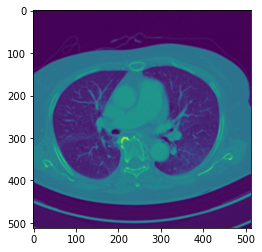

In [2]:
file_path = '../Code/benchmark_liver_tumor/raw/SN00017916/SN00017916_0001.dcm'
sample = pdc.dcmread(file_path)
sample_np = sample.pixel_array
plt.imshow(sample_np)
plt.show()

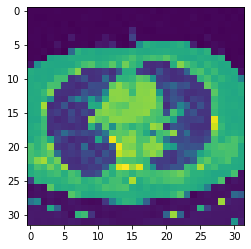

In [3]:
sample_np_resized = cv2.resize(sample_np, dsize=(32,32))    # 이미지 사이즈를 조정해준다.
plt.imshow(sample_np_resized)
plt.show()

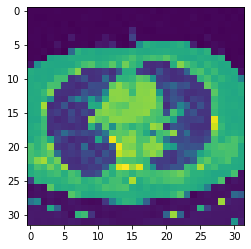

In [4]:
# Normalization
sample_np_resized_normalized = cv2.normalize(sample_np_resized, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F )
plt.imshow(sample_np_resized_normalized)
plt.show()

### Dcm_CLAHE 이미지 
- original image
- resize image
- normalized image

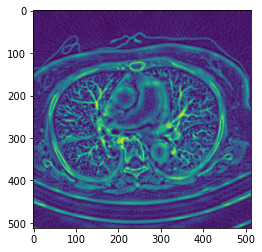

In [29]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
sameple_clahe = clahe.apply(sample_np)
plt.imshow(sameple_clahe)
plt.show()



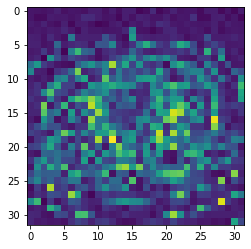

In [30]:
sample_clahe_resized = cv2.resize(sameple_clahe, dsize=(32,32))    # 이미지 사이즈를 조정해준다.
plt.imshow(sample_clahe_resized)
plt.show()

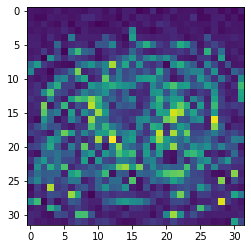

In [32]:
denoised_image = bm3d.bm3d(sample_clahe_resized, sigma_psd=300/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
plt.imshow(denoised_image)
plt.show()

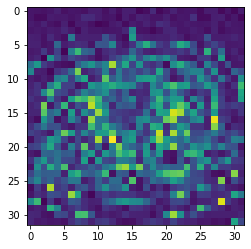

In [33]:
# Normalization
sample_clahe_resized_normalized = cv2.normalize(sample_clahe_resized, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F )
plt.imshow(sample_clahe_resized_normalized)
plt.show()

### Dcm_CLAHE 이미지 
- original_CLAHE image
- resize image (1000X1000 pixel)
- normalized image

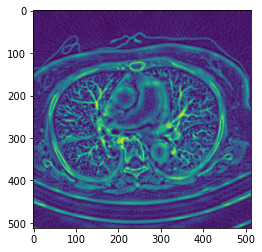

In [8]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
sameple_clahe = clahe.apply(sample_np)
plt.imshow(sameple_clahe)
plt.show()

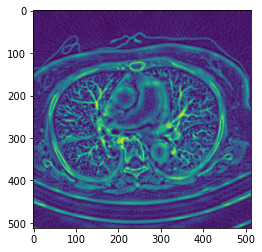

In [9]:
sample_np_resized = cv2.resize(sameple_clahe, dsize=(512,512))    # 이미지 사이즈를 조정해준다.
plt.imshow(sample_np_resized)
plt.show()

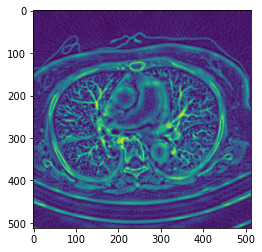

In [19]:
# Normalization
sample_np_resized_normalized = cv2.normalize(sample_np_resized, dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F )
plt.imshow(sample_np_resized_normalized)
plt.show()

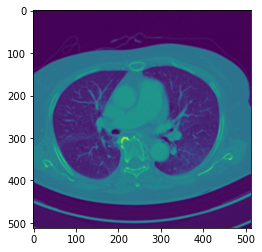

In [20]:
file_path = '../Code/benchmark_liver_tumor/raw/SN00017916/SN00017916_0001.dcm'
sample = pdc.dcmread(file_path)
sample_np = sample.pixel_array
plt.imshow(sample_np)
plt.show()

In [18]:
!pip install bm3d

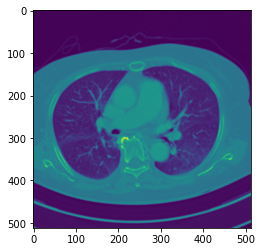

In [5]:
import bm3d

denoised_image = bm3d.bm3d(sample_np, sigma_psd=30/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
plt.imshow(denoised_image)
plt.show()

In [17]:
from IPython.display import display, Image
from PIL import Image 

In [22]:
file_path = '../Code/benchmark_liver_tumor/raw/SN00017916/SN00017916_0001.dcm'

ds = pdc.dcmread(file_path)
file_meta = ds.file_meta
file_meta.TransferSyntaxUID = "1.2.840.10008.1.2.5"

img = Image.open("../Code")
npa = np.asarray(img)
ds.PixelData = img.tobytes()

ds.save_as("result.dcm")


UnidentifiedImageError: cannot identify image file '../Code/benchmark_liver_tumor/raw/SN00017916/SN00017916_0001.dcm'

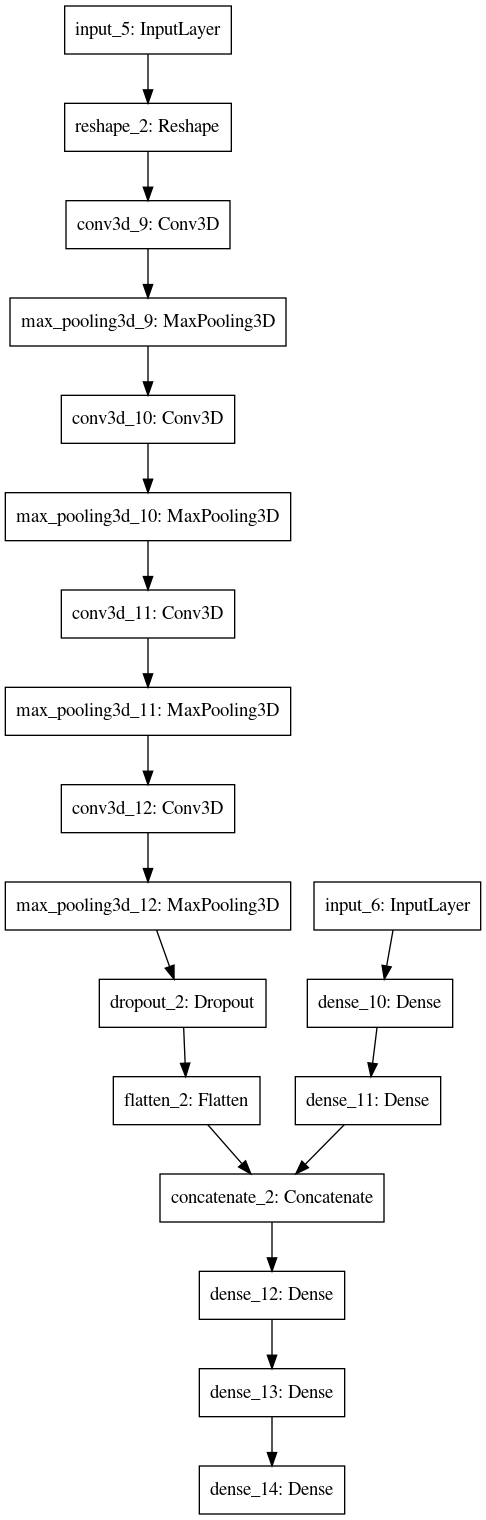

In [11]:
display(Image(filename))